# Лабораторная работа 9

Понижение размерности признакового пространства

Выполнил: 6132, Скиданова Анна

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn import decomposition
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

0 Найти датасет (желательно датасет для многоклассовой классификации, либо дадасет из предыдущей работы с результатами кластеризации) с большим количеством вещественных признаков (от 20-ти шт.). Добавьте описание датасета (в случае большого количества однотипных признаков, достаточно краткое описание на ваше усмотрение).

In [560]:
# Таблица клиентов
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Описание данных

In [561]:
df.dtypes 

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

##### Пояснение для каждой колонки: 

ID: Customer's unique identifier   
Year_Birth: Customer's birth year   
Education: Customer's education level   
Marital_Status: Customer's marital status  
Income: Customer's yearly household income   
Kidhome: Number of children in customer's household   
Teenhome: Number of teenagers in customer's household    
Dt_Customer: Date of customer's enrollment with the company     
Recency: Number of days since customer's last purchase    
Complain: 1 if the customer complained in the last 2 years, 0 otherwise   

MntWines: Amount spent on wine in last 2 years   
MntFruits: Amount spent on fruits in last 2 years   
MntMeatProducts: Amount spent on meat in last 2 years   
MntFishProducts: Amount spent on fish in last 2 years    
MntSweetProducts: Amount spent on sweets in last 2 years   
MntGoldProds: Amount spent on gold in last 2 years   

NumDealsPurchases: Number of purchases made with a discount   
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise    
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise    
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise   
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise   
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise   
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise   

NumWebPurchases: Number of purchases made through the company’s website   
NumCatalogPurchases: Number of purchases made using a catalogue    
NumStorePurchases: Number of purchases made directly in stores   
NumWebVisitsMonth: Number of visits to company’s website in the last month    

In [562]:
#Убираем категориальные признаки
df.pop('Marital_Status')
df.pop('Dt_Customer')

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

1 Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве двух признаков, используя алгоритм t-SNE (sklearn.manifold.TSNE). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [563]:
# убираем значения nan, бесконечность и слишком большие для float64
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [564]:
# переделываем метки классов
Ed = df['Education'].astype('category')
Ed = Ed.cat.codes
df['Education']=Ed

# чистим dataframe
df=clean_dataset(df)

Ed=df['Education'].astype(np.uint8)
df.pop('Education')

# корректируем индексацию
Ed.reset_index(drop=True, inplace=True)

In [565]:
#  алгоритм t-SNE
tsne = manifold.TSNE(n_components=2)
X_tsne = tsne.fit_transform(df)

<AxesSubplot:>

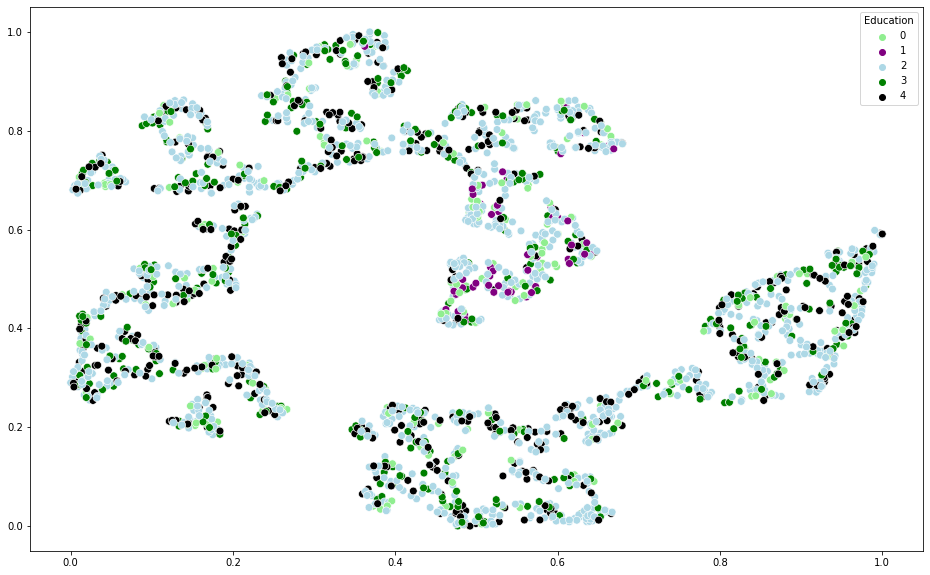

In [566]:
# визуализируем
import seaborn as sns
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne-x_min) / (x_max-x_min) # нормализовано
plt.figure(figsize=(16, 10))
sns.scatterplot(x=X_norm[:, 0], y=X_norm[:, 1],hue=Ed,s=60,
                palette=['lightgreen','purple','lightblue','green','black'])

2 Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве, используя метод главных компонент (sklearn.decomposition.PCA) или Truncated SVD (sklearn.decomposition.TruncatedSVD). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [567]:
# используем метод Truncated SVD
svd=decomposition.TruncatedSVD(n_components=2, algorithm='randomized', n_iter=5,  tol=0.0)
tr_svd=svd.fit_transform(df)

<AxesSubplot:>

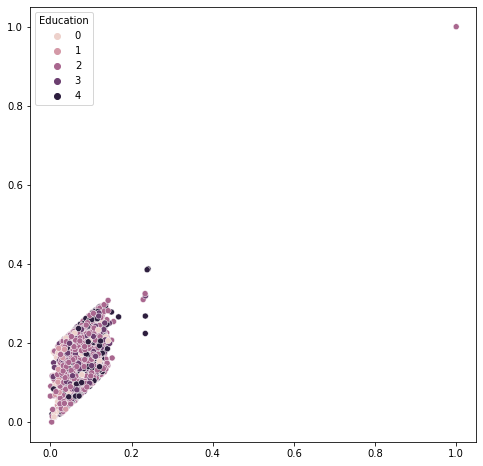

In [568]:
# визуализируем
x_min, x_max = tr_svd.min(0), tr_svd.max(0)
X_norm = (tr_svd-x_min) / (x_max-x_min) # нормализовано
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_norm[:, 0], y=X_norm[:, 1],hue=Ed)

3 На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. Чтобы оценить необходимое количество компонент, постройте график Number of components / Total explained variance. Пример построения есть в статье от ODS.

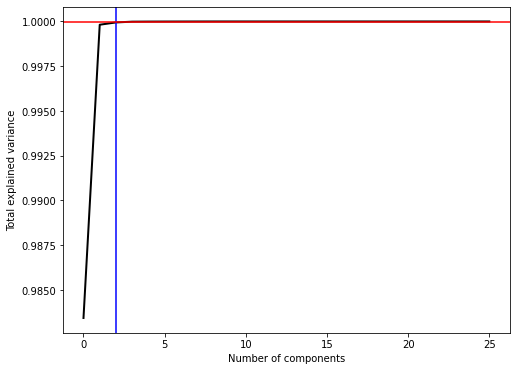

In [569]:
pca = decomposition.PCA().fit(df)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axvline(2, c='b')
plt.axhline(0.99999, c='r')
plt.show();

4 Используя любой алгоритм классификации, исследуйте влияние понижения размерности признакового пространства на качество классификации. Обучите модель, используя все признаки,затем обучите модель после понижения признаковго пространства. Сравните метрики качества двух моделей. Сделайте выводы. Для выполнения данного задания набор данных можете взять новый.

PS: если исходные признаки были сильно коррелированы и вы правильно провели процедуру снижения размерности, оставив "правильное" число главных компонент, не потеряв существенной информации при этом, качество некоторых моделей может вырасти. Но в данной работе не требуется, чтобы непременно был выигрыш.

In [597]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(df, Ed, test_size=0.5, random_state=0)

# обучаем
model1 = RandomForestClassifier(criterion='entropy', n_estimators=21)
model1.fit(Xtrain1, Ytrain1)

RandomForestClassifier(criterion='entropy', n_estimators=21)

In [598]:
y_pred1 = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.5649819494584838


In [575]:
importances = model1.feature_importances_

In [590]:
# Ищем наиболее важные
def m(k):
    im = np.vstack([importances, df.columns])
    s={}
    for i in range(0,im.shape[1]):
        s[im[1,i]]=im[0,i]
    w=sorted(s,reverse=True,key=s.get)[0:k]
    return w

In [591]:
# Нашли
w=sorted(s,reverse=True,key=s.get)[0:4]
df2 = df[w]
df2.reset_index(drop=True, inplace=True)

In [592]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(df2, Ed, test_size=0.5, random_state=0)
model1.fit(Xtrain1, Ytrain1)

RandomForestClassifier(criterion='entropy', n_estimators=21)

In [596]:
y_pred1 = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.5568592057761733


Как видно, при использовании меньшего количества параметров точность изменяется крайне незначительно. 